# Heat Equation

Consider the heat equation defined on the domain $x \in [0,1]$ and $t \in [0,1]$ with boundary conditions $u(0,t) = u(1,t) = 0$ and initial condition $u(x,0) = \sin(\pi x)$:

$$
\frac{\partial u}{ \partial t}  = \frac{\partial^2 u}{\partial x^2} \\
u(x,0) = \sin(\pi x) \\
u(0,t) = u(1,t) = 0
$$

and we collect observation data
$$
\tilde{u}(x,t) = u(x,t) + \epsilon
$$


### Newton-Raphson Implicit Method for Heat Equation Simulation

#### Background
The heat equation, a partial differential equation (PDE), models the distribution of heat (or variation in temperature) in a given region over time. It is expressed as:

$$
\frac{\partial u}{ \partial t}  = \frac{\partial^2 u}{\partial x^2},
$$

where $ u(x, t) $ represents the temperature at position $ x $ and time $ t $. 

#### Discretization
To solve this PDE numerically, we discretize both the spatial domain (using grid points indexed by $ i $) and time (using time steps indexed by $ n $). The discretized version of the heat equation using central difference for space and forward difference for time is:

$$
\frac{u^{n+1}_i - u^n_i}{\Delta t} = \frac{u^{n+1}_{i+1} - 2u^{n+1}_i + u^{n+1}_{i-1}}{\Delta x^2},
$$

where $ \Delta t $ is the time step, $ \Delta x $ is the spatial step, $ u^n_i $ is the temperature at grid point $ i $ and time step $ n $, and $ u^{n+1}_i $ is the temperature at the same grid point at the next time step.

#### Newton-Raphson Method
The Newton-Raphson method is an iterative technique used for finding successively better approximations to the roots (or zeroes) of a real-valued function. In the context of the heat equation, it's used to solve the nonlinear system of equations resulting from the discretization.

#### Implementation Steps
1. **Initialization:** Start with an initial guess for the temperature distribution at $ t = 0 $, denoted as $ u^0 $.

2. **Iteration:** For each time step $ n $, perform the following steps to find $ u^{n+1} $:
   - **Function Evaluation (`F(u)`) :** Calculate the discretized heat equation which represents the residual (or difference) between the left and right sides of the discretized equation.
   - **Jacobian Calculation (`F_prime(u)`) :** Compute the Jacobian matrix, which is the derivative of $ F(u) $ with respect to $ u $. This matrix provides information on how changes in $ u $ affect $ F(u) $.
   - **Solve Linear System:** Solve the linear system $ F_{prime}(u) \cdot \delta u = -F(u) $ to find $ \delta u $, the correction term.
   - **Update Solution:** Update the current approximation of $ u $ by adding $ \delta u $ to it.
   - **Check Convergence:** If $ \delta u $ is sufficiently small (below a tolerance level), consider the current approximation of $ u $ as the solution for this time step.

3. **Repeat for Next Time Step:** Move to the next time step and use the obtained solution as the initial guess for the new time step.

4. **Boundary Conditions:** Apply boundary conditions at each iteration. For the heat equation, these often involve fixing the temperature at the boundaries of the spatial domain.

5. **Termination:** Continue this process until the desired final time is reached.

#### Numerical Stability and Accuracy
- **Stability:** The choice of $ \Delta t $ and $ \Delta x $ is crucial. Improper values can lead to numerical instability.
- **Accuracy:** Higher accuracy can be achieved by using smaller $ \Delta t $ and $ \Delta x $, but at the cost of increased computational effort.

#### Applications
This method is widely used in computational physics, engineering, and applied mathematics for solving heat transfer problems and other similar types of PDEs.

Shape of the solution array: (50, 100)


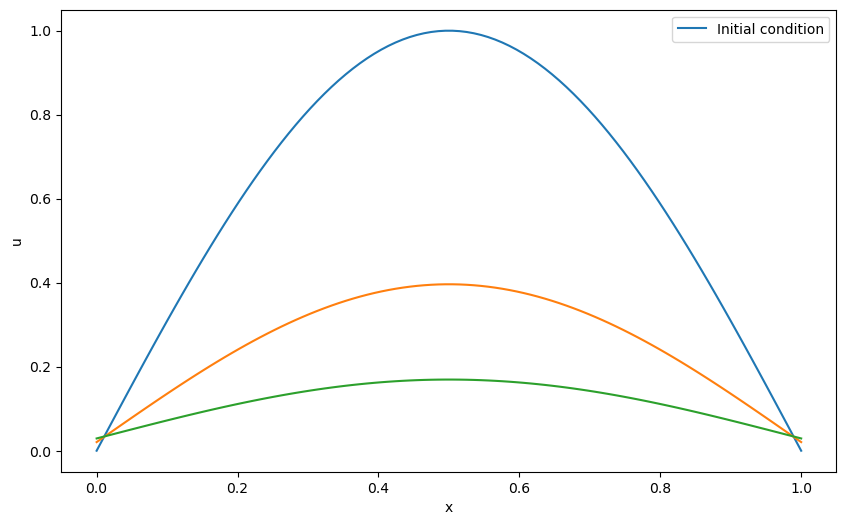

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
N = 100  # Number of grid points
dx = 1.0 / (N - 1)  # Grid spacing
dt = 0.01  # Time step
max_iter = 50  # Maximum iterations for Newton-Raphson
tol = 1e-6  # Tolerance for convergence

# Initial condition
x = np.linspace(0, 1, N)
u0 = np.sin(np.pi * x)

# Function F(u) representing the discretized heat equation
def F(u, u_prev):
    F_u = np.zeros_like(u)
    # Boundary conditions
    F_u[0] = u[0]  # Boundary condition at x=0
    F_u[-1] = u[-1]  # Boundary condition at x=1
    # Interior points
    F_u[1:-1] = (u[1:-1] - u_prev[1:-1]) / dt - (u[2:] - 2 * u[1:-1] + u[:-2]) / dx**2
    return F_u

# Derivative of F(u)
def F_prime(u):
    dF = np.zeros((N, N))  # Initialize a 2D array of size N x N
    np.fill_diagonal(dF[1:], -1 / dx**2)  # Fill the upper diagonal
    np.fill_diagonal(dF[:, 1:], -1 / dx**2)  # Fill the lower diagonal
    dF[1:-1, 1:-1] += np.diag((1 / dt + 2 / dx**2) * np.ones(N-2))  # Fill the main diagonal for interior points
    dF[0, 0] = dF[-1, -1] = 1  # Boundary conditions
    return dF


# Newton-Raphson iteration
def newton_raphson(u0, max_iter, tol):
    u = u0.copy()
    for _ in range(max_iter):
        F_u = F(u, u0)
        F_prime_u = F_prime(u)
        # Boundary conditions adjustments
        F_u[0] = u[0]  # u_0 = 0
        F_u[-1] = u[-1]  # u_N-1 = 0
        # Update
        delta_u = np.linalg.solve(F_prime_u, -F_u)
        u += delta_u
        # Check for convergence
        if np.linalg.norm(delta_u, np.inf) < tol:
            break
    return u

# Simulation
u_prev = u0.copy()
time_steps = 49  # Number of time steps to simulate
u_sol = [u_prev.copy()]  # Storing the solution at each time step

for _ in range(time_steps):
    u_next = newton_raphson(u_prev, max_iter, tol)
    u_sol.append(u_next.copy())
    u_prev = u_next

# Result
u_sol = np.array(u_sol)  # Convert to NumPy array for easier handling
print("Shape of the solution array:", u_sol.shape)  # Check the shape of the solution array (should be time_steps+1 x N)

# plot the solution
plt.figure(figsize=(10, 6))
plt.plot(x, u_sol[0], label='Initial condition')
plt.plot(x, u_sol[10])
plt.plot(x, u_sol[20])
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
